In [1]:
import numpy as np
import pandas as pd
import os


In [2]:
current_dir = os.getcwd()
os.chdir('../')

In [3]:
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)

In [4]:
df = pd.read_csv(r'Data/bank-additional-full.csv')

In [5]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
df.shape

(41188, 21)

## Insights
    1. the datatypes are correctly identified.
    2. we have 5 float column, 5 int column, and 11 object columns.
    3. There is no missing values present in the dataset.
    4. dataset shape is 41188 rows and 21 columns

In [8]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

### Age column

In [46]:
plt.figure(figsize = (100, 20))

<Figure size 10000x2000 with 0 Axes>

<Figure size 10000x2000 with 0 Axes>

In [47]:
age_count = df.age.value_counts()

In [51]:
age_df = age_count.reset_index()

In [60]:
age_df[age_df['count'] > 1000]

,age,count
0,31,1947
1,32,1846
2,33,1833
3,36,1780
4,35,1759
5,34,1745
6,30,1714
7,37,1475
8,29,1453
9,39,1432


<BarContainer object of 78 artists>

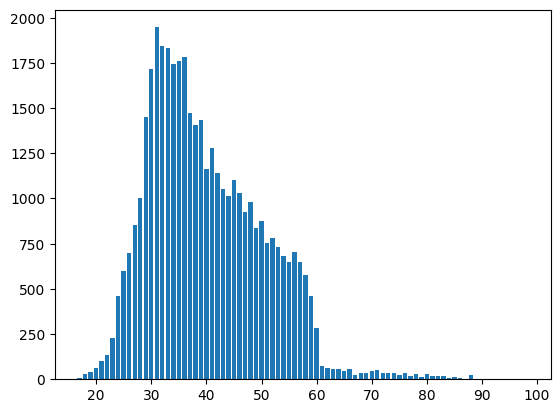

In [62]:
plt.bar(age_df['age'], age_df['count'])

# insights 
    1. age 30 to 40 have the high counts from the dataset

# categorical columns

In [74]:
numerical_columns = df.select_dtypes(include=['number'])

In [75]:
categorical_columns = df.drop(columns= numerical_columns)

In [81]:
print('numerical columns are:\n\n ', numerical_columns.columns, "\n\n the categorical columns are:\n\n", categorical_columns.columns)

numerical columns are:

  Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object') 

 the categorical columns are:

 Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')


In [82]:
cat_dct = {}
for col in categorical_columns.columns:
    cat_dct.update({col : categorical_columns[col].value_counts().reset_index()})

In [85]:
cat_dct['job']

,job,count
0,admin.,10422
1,blue-collar,9254
2,technician,6743
3,services,3969
4,management,2924
5,retired,1720
6,entrepreneur,1456
7,self-employed,1421
8,housemaid,1060
9,unemployed,1014


In [ ]:
# 